<h2>FIN5622 Project #3
    <p class="text-primary">S&P100 Returns Clustering</p>
</h2>

<div class = "alert alert-block alert-danger">
    <b>Due Date</b>: April 9nd, 2021, 11:59PM EST
</div>  

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project, we will use k-means clustering to explore annual returns from the 100 component stocks from the S&P100 over the period from 2016 to 2019. Specifically, we will use the resulting clusters to distinguish between different stock return profiles among the 99 stocks within the index. 
    </div>
</div>
<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from one task informing work in later tasks. Include all code used to produce your results, and support your answers with textual explanations if neccessary. You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5622_Project_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Read in the "SP100_annual_returns.csv" dataset using the pandas <code>read_csv</code> function and store it in a dataframe called <code>stock_returns</code>. The dataset contains annual returns for the 99 component stocks from the S&P 100 over the years 2016, 2017, 2018, and 2019. 
    <br><br>
    Set the column "Ticker" as the dataframe's index. Check that the shape of <code>stock_returns</code> is <code>(99, 4)</code>, where each row represent a different stock and each column represents a different year of returns.
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

In [2]:
path = '../Data'
stock_returns = pd.read_csv(f'{path}/SP100_annual_returns.csv')
stock_returns

,Ticker,2016,2017,2018,2019
0,AAPL,11.760915,39.517452,-5.540897,63.635358
1,ABBV,9.341715,47.047173,-0.961085,2.921372
2,ABT,-13.148336,41.889572,25.512152,19.950791
3,ACN,13.410868,28.770155,-6.431124,41.352327
4,ADBE,9.158710,53.191309,25.543991,37.692032
...,...,...,...,...,...
94,VZ,18.812401,3.895387,10.666996,12.956664
95,WBA,-1.017906,-11.105816,-3.718737,-11.644399
96,WFC,4.533626,12.407895,-24.627405,19.425976
97,WMT,14.868893,38.749651,-3.492238,26.361709


In [3]:
stock_returns = stock_returns.set_index('Ticker')
stock_returns

,2016,2017,2018,2019
Ticker,,,,
AAPL,11.760915,39.517452,-5.540897,63.635358
ABBV,9.341715,47.047173,-0.961085,2.921372
ABT,-13.148336,41.889572,25.512152,19.950791
ACN,13.410868,28.770155,-6.431124,41.352327
ADBE,9.158710,53.191309,25.543991,37.692032
...,...,...,...,...
VZ,18.812401,3.895387,10.666996,12.956664
WBA,-1.017906,-11.105816,-3.718737,-11.644399
WFC,4.533626,12.407895,-24.627405,19.425976


In [4]:
stock_returns.shape

(99, 4)

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    Next, we will apply k-means clustering to <code>stock_returns</code>. It is important for us to choose an appropriate number of clusters, which we will select by examining the within-cluster sum-of-squares (WCSS).
    <br><br>
    Run the k-means algorithm with the number of clusters ranging from 1 to 20 using a loop and calling <code>KMeans()</code> from the <code>sklearn.cluster</code> module, and using the <code>fit()</code> method. Additionally, set the following optional paramters for <code>KMeans()</code> to the values listed below:
    <ul>
        <li><code>random_state = 5622</code></li>
        <li><code>init = 'k-means++'</code></li>. 
    </ul>
    At each iteration, use the <code>fit()</code> method to create the k-means model, then save the model's WCSS in an array. Recall that the WCSS is stored in the <code>inertia_</code> attribute of the fitted k-means model. 
    <br><br>
    Plot the series of WCSS in a line plot, and provide axis labels and a title. You should observe a monotonically decrease line representing the number of clusters ranging from 1 to 20 on the x-axis and the WCSS on the y-axis.
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [5]:
kmeans_models = []

for k in range (1,21):
    kmeans_model_list = KMeans(n_clusters = k, init = 'k-means++', random_state = 5622)
    kmeans_fit = kmeans_model_list.fit(stock_returns)
    kmeans_models.append(kmeans_fit)
kmeans_models

[KMeans(n_clusters=1, random_state=5622),
 KMeans(n_clusters=2, random_state=5622),
 KMeans(n_clusters=3, random_state=5622),
 KMeans(n_clusters=4, random_state=5622),
 KMeans(n_clusters=5, random_state=5622),
 KMeans(n_clusters=6, random_state=5622),
 KMeans(n_clusters=7, random_state=5622),
 KMeans(random_state=5622),
 KMeans(n_clusters=9, random_state=5622),
 KMeans(n_clusters=10, random_state=5622),
 KMeans(n_clusters=11, random_state=5622),
 KMeans(n_clusters=12, random_state=5622),
 KMeans(n_clusters=13, random_state=5622),
 KMeans(n_clusters=14, random_state=5622),
 KMeans(n_clusters=15, random_state=5622),
 KMeans(n_clusters=16, random_state=5622),
 KMeans(n_clusters=17, random_state=5622),
 KMeans(n_clusters=18, random_state=5622),
 KMeans(n_clusters=19, random_state=5622),
 KMeans(n_clusters=20, random_state=5622)]

In [6]:
distances = []

for k in range (0,20):
    intertias = kmeans_models[k].inertia_
    distances.append(intertias)
distances

[138681.77060864956,
 104411.2402287066,
 86034.29540067229,
 76363.5453712133,
 65469.83900365095,
 57625.031346557145,
 51278.11390442438,
 47890.53938422264,
 43844.2235422449,
 40900.95222034627,
 37668.20771102342,
 34560.534544745205,
 32473.635733012117,
 30395.367613139217,
 28439.78443927077,
 27455.850155808355,
 25093.312117775782,
 23285.85206631907,
 21761.297879357848,
 20892.7955214619]

Text(0, 0.5, 'n_clusters')

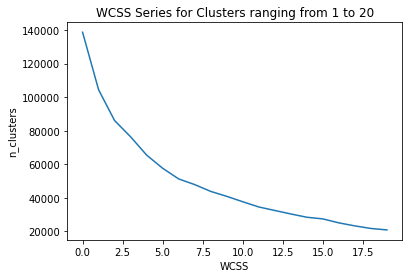

In [7]:
plt.plot(distances)
plt.title('WCSS Series for Clusters ranging from 1 to 20')
plt.xlabel('WCSS')
plt.ylabel('n_clusters')

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    While there is no "correct" choice for the number of clusters, there are several different methods or heuristics we can use to help us select an appropriate number of clusters. For our final model, select the number of clusters that results in a 50% reduction to the WCSS, which should be 4 clusters. 
    <br>
    <ul>
        <li>Refit the k-means algorithm on the <code>stock_returns</code> dataframe using 4 clusters, and remember to set <code>random_state = 5622</code> and <code>init = 'k-means++'</code>. Store the fitted model in a variabled called <code>cluster_model</code>.</li>  
        <li>Then, using the <code>fit_predict()</code> method, assign each stock from the the <code>stock_returns</code> dataframe to a cluster and store the results in another variable called <code>clusters</code>. Check that <code>clusters</code> should be a 1-d array of length 99.</li>
    </ul>
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [8]:
cluster_model = KMeans(n_clusters = 4, random_state = 5622, init = 'k-means++').fit(stock_returns)

clusters = KMeans(n_clusters = 4, random_state = 5622, init = 'k-means++').fit_predict(stock_returns)
clusters

array([3, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3,
       0, 3, 3, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 3, 1, 0, 3, 0, 0, 2, 0, 0,
       1, 3, 1, 3, 0, 1, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       3, 1, 1, 1, 1, 3, 0, 0, 0, 1, 1, 3, 1, 3, 3, 1, 2, 3, 0, 3, 3, 1,
       3, 1, 3, 0, 3, 1, 0, 0, 0, 1, 0])

In [9]:
clusters.shape

(99,)

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    Print out the list of stocks associated with each of the 4 clusters from the k-means clustering results stored in <code>clusters</code>. For each cluster, calculate its average return for each year from 2016 - 2019.
    <br><br>
    Plot the average returns for all 4 clusters in a single line plot. Also include on the plot the overall average annual returns for all 99 stocks. Your final plot should have 5 lines, representing the average returns under each cluster as well as the overall average returns on the y-axis, and the years 2016 - 2019 on the x-axis. Provide axis labels, a legend, and a title for the plot.
    <p style="text-align:right;">[25pts]</p>
    </div>
</div>

In [10]:
stock_returns['clusters'] = cluster_model.labels_


In [11]:
for k in range (0,4):
    print(list(stock_returns.loc[stock_returns['clusters'] == k].index))

['BIIB', 'BK', 'BKNG', 'BMY', 'BRK.B', 'CL', 'CVS', 'CVX', 'DD', 'DIS', 'DUK', 'F', 'FDX', 'GD', 'GILD', 'GM', 'IBM', 'JNJ', 'MDLZ', 'MET', 'MMM', 'MO', 'ORCL', 'OXY', 'PEP', 'SPG', 'UPS', 'VZ', 'WBA', 'WFC', 'XOM']
['ABBV', 'ABT', 'ADBE', 'AMGN', 'AMT', 'AMZN', 'AXP', 'BA', 'COP', 'COST', 'CRM', 'CSCO', 'EXC', 'GOOG', 'HD', 'INTC', 'KO', 'LLY', 'LOW', 'MA', 'MCD', 'MDT', 'MRK', 'MSFT', 'NEE', 'NFLX', 'NKE', 'PFE', 'PG', 'PYPL', 'SBUX', 'TMO', 'UNH', 'V', 'WMT']
['AIG', 'GE', 'KHC', 'SLB']
['AAPL', 'ACN', 'ALL', 'BAC', 'BLK', 'C', 'CAT', 'CHTR', 'CMCSA', 'COF', 'DHR', 'EMR', 'FB', 'GS', 'HON', 'JPM', 'KMI', 'LMT', 'MS', 'NVDA', 'PM', 'QCOM', 'RTX', 'SO', 'T', 'TGT', 'TXN', 'UNP', 'USB']


In [12]:
cluster_0_avg = stock_returns.loc[stock_returns['clusters'] == 0, stock_returns.columns[:-1]].mean()
cluster_0_avg

2016     8.073538
2017    10.780062
2018   -12.592408
2019    10.882895
dtype: float64

In [13]:
cluster_1_avg = stock_returns.loc[stock_returns['clusters'] == 1, stock_returns.columns[:-1]].mean()
cluster_1_avg

2016     5.199220
2017    30.176662
2018    13.932853
2019    23.824529
dtype: float64

In [14]:
cluster_2_avg = stock_returns.loc[stock_returns['clusters'] == 2, stock_returns.columns[:-1]].mean()
cluster_2_avg

2016    13.575740
2017   -22.323119
2018   -58.344341
2019    16.145950
dtype: float64

In [15]:
cluster_3_avg = stock_returns.loc[stock_returns['clusters'] == 3, stock_returns.columns[:-1]].mean()
cluster_3_avg

2016    26.175760
2017    22.254892
2018   -16.103058
2019    38.512750
dtype: float64

In [16]:
years = [2016, 2017, 2018, 2019]
averages_per_year = []

for k in range (0,4):
    avg = years[k], (cluster_0_avg[k] + cluster_1_avg[k] + cluster_2_avg[k] + cluster_3_avg[k])/4
    averages_per_year.append(avg)
averages_per_year

#unsure how to plot this data as when I try: plt.plot(averages_per_year) it does not show properly

[(2016, 13.25606441481181),
 (2017, 10.222124155692402),
 (2018, -18.276738645603395),
 (2019, 22.34153086031646)]

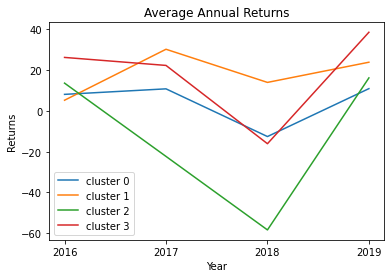

In [17]:
for k in range (0,4):
    plt.plot(stock_returns.loc[stock_returns['clusters'] == k, stock_returns.columns[:-1]].mean())
    
plt.legend([f'cluster {i}' for i in range (0,4)])
plt.title('Average Annual Returns')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.show()

In [18]:
averages_per_year[1]

(2017, 10.222124155692402)

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 6</b>
    </div>
    <div class = "panel-body"> 
    Examine the line plot from the previous task. Describe how the return profile for each cluster differ compared to the overall average return series. Do you believe the k-means clustering algorithm did a good job partitioning the 99 stocks in our dataset into the 4 clusters?
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

I believe that k-means did a reasonable job at clustering the data into 4 clusters. However, I do not believe that 4 clusters was the proper amount. If 4 clusters was the proper number of clusters I believe we would have seen more distinction in clusters 0, 1 , and 3. While I am unable to graph the averages each year alongside the data. The average is pulled down by cluster 2. If I had to guess, 2-3 more clusters to add more distinction would be the proper number of clusters. 

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 7</b>
    </div>
    <div class = "panel-body"> 
    Below are the annual returns series for Twitter (TWTR) and General Mills (GIS) over the same time period (2016 - 2019). Both of which are not components of the S&P 100. 
    <br>
    <code>
    new_stocks = np.array([
        [-35.03976321, 38.73053638, 17.98194704, 10.90072715], #TWTR 
        [9.811733774,-0.653042047,-37.93613677,35.85701138,] #GIS
    ])
    </code>
    <br>Assign TWTR and GIS to one of the 4 clusters using the k-means clustering model built in Task 3, and using the <code>predict()</code> method. There should be one cluster label for each stock, TWTR and GIS. 
    <br><br>
    Comment on whether the clusters assigned makes sense for each stock, both judging by the other stocks within that cluster and also by the return profile for TWTR and GIS.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

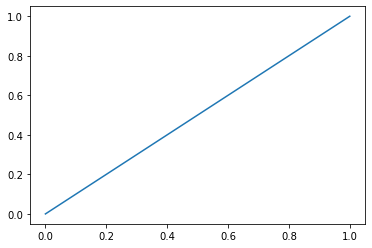

In [42]:
new_stocks = np.array([[-35.03976321, 38.73053638, 17.98194704, 10.90072715], #TWTR 
                       [9.811733774,-0.653042047,-37.93613677,35.85701138,] #GIS 
                      ])

new_stock_clusters = KMeans(n_clusters = 2, random_state = 5622, init = 'k-means++').fit_predict(new_stocks)
new_stock_clusters

plt.plot(new_stock_clusters)

In [38]:
cluster_0 = stock_returns.loc[stock_returns['clusters'] == 0, stock_returns.columns[:-1]]
print(cluster_0)


             2016       2017       2018       2019
Ticker                                            
BIIB    -7.723403  11.634803  -5.699776  -1.402182
BK      15.742527  14.561804 -11.480892   9.127410
BKNG    13.967165  17.000684  -0.885511  17.592734
BMY    -14.492260   7.426163 -13.806398  24.481194
BRK.B   21.052262  19.575006   2.962439  10.374302
CL       0.438812  16.453035 -21.308727  17.055306
CVS    -19.638442  -5.924348  -7.296104  15.922447
CVX     31.233638  10.065586 -10.255811  14.213881
DD      13.017055  26.548115 -23.761364 -14.011893
DIS      0.669734   4.650359   3.544260  28.903243
DUK     12.607133  12.182615   7.152575   9.791521
F      -10.321740   7.970167 -43.390879  25.958912
FDX     23.166253  30.168089 -42.577711  -4.895632
GD      25.041846  18.110815 -24.004712  13.797942
GILD   -32.288824   2.914470 -10.447067   7.585516
GM       7.191513  21.329442 -16.318274  13.118919
IBM     23.437932  -4.069511 -25.564100  21.168688
JNJ     14.262039  21.853471  -

For the list of new stocks, I would expect the values to be grouped together based off very little data. Because there is not a lot of data, I would expected negative returns to be clustered together and vice versa for positive data.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Extra Credit</b>
    </div>
    <div class = "panel-body"> 
    Repeat Tasks 3 - 5 under hierarchical clustering, also using 4 clusters. 
    <br><br>
    Recall that we can build a hierarchical clustering model by calling <code>AgglomerativeClustering()</code> from the <code>sklearn.cluster</code> module, and using the <code>fit()</code> method. Additionally, set the following optional parameters for <code>AgglomerativeClustering()</code> to the values listed below:
    <ul>
        <li><code>affinity = 'euclidean'</code></li>
        <li><code>linkage = 'ward'</code></li>. 
    </ul>
    Compare and contrast the clusters created under the k-means clustering algorithm vs. the hierarchical clustering algorithm. Which algorithm do you feel clustered the <code>stock_returns</code> dataset better, and why?
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>